In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

In [3]:
path_img = "test_images/DSCN2991.JPG"
image = cv2.imread(path_img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

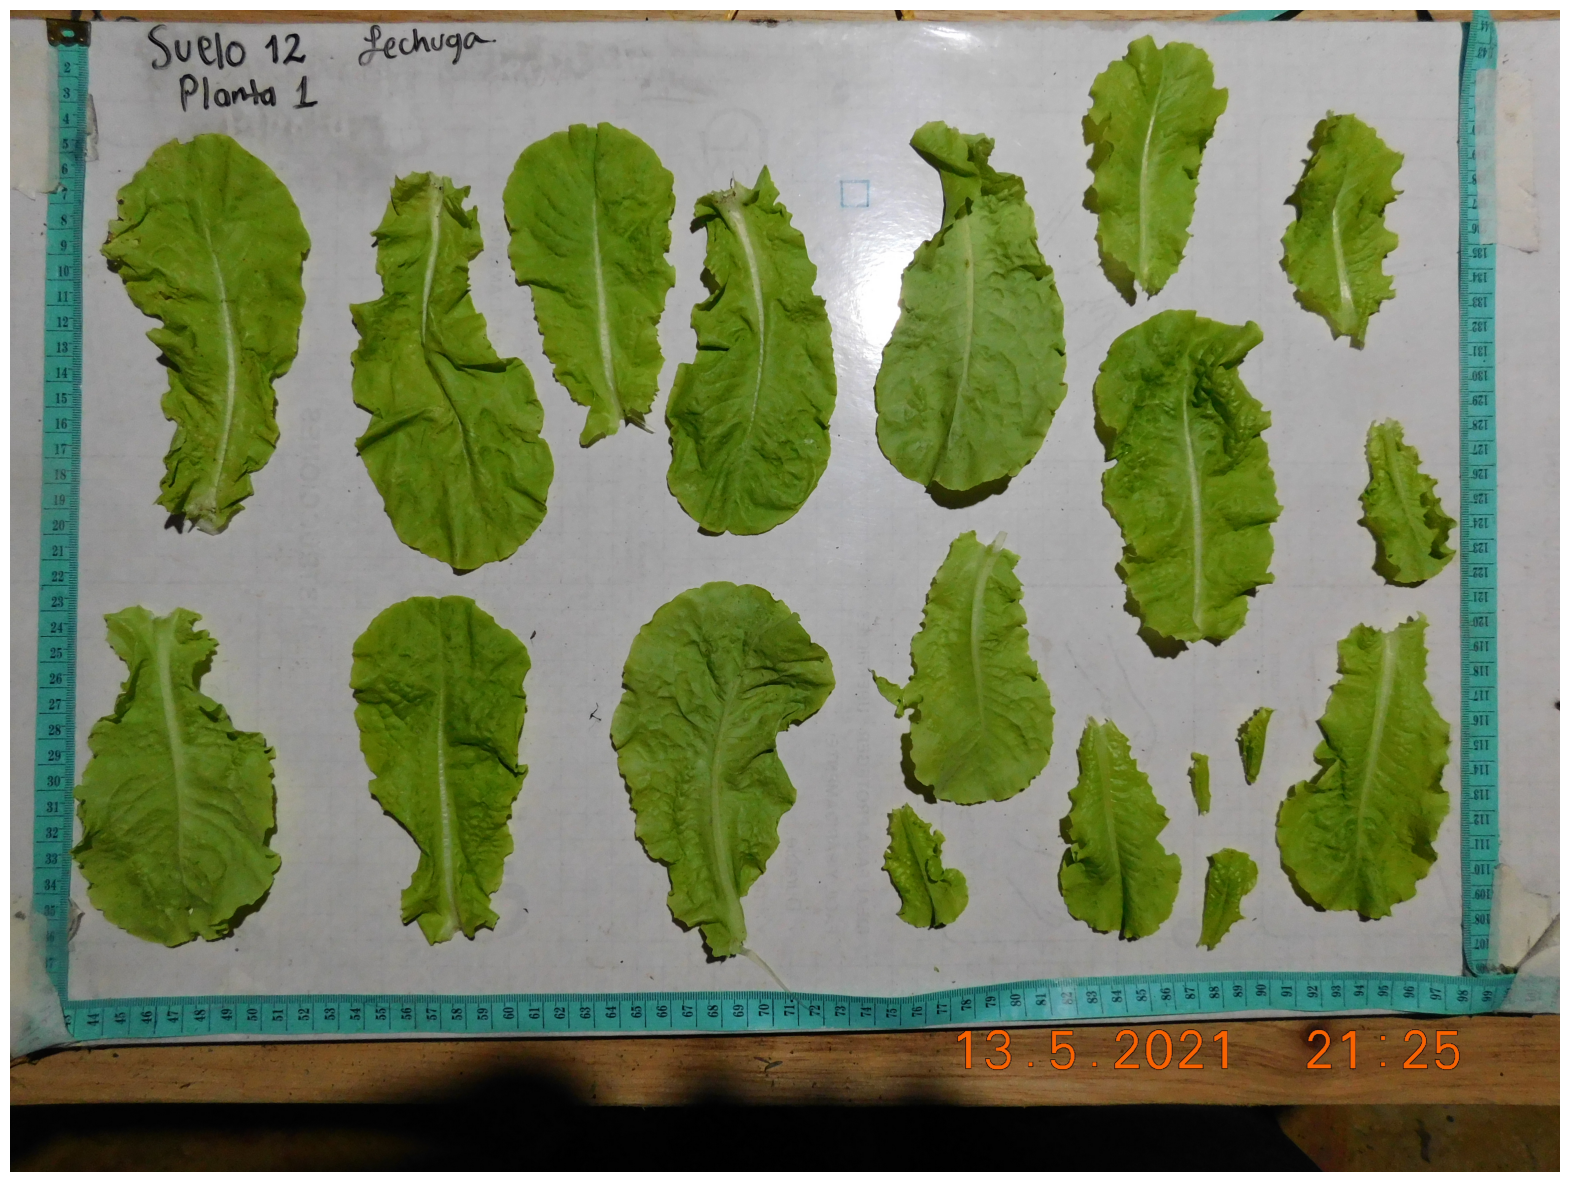

In [4]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

Image dimensions:  3456 4608 3


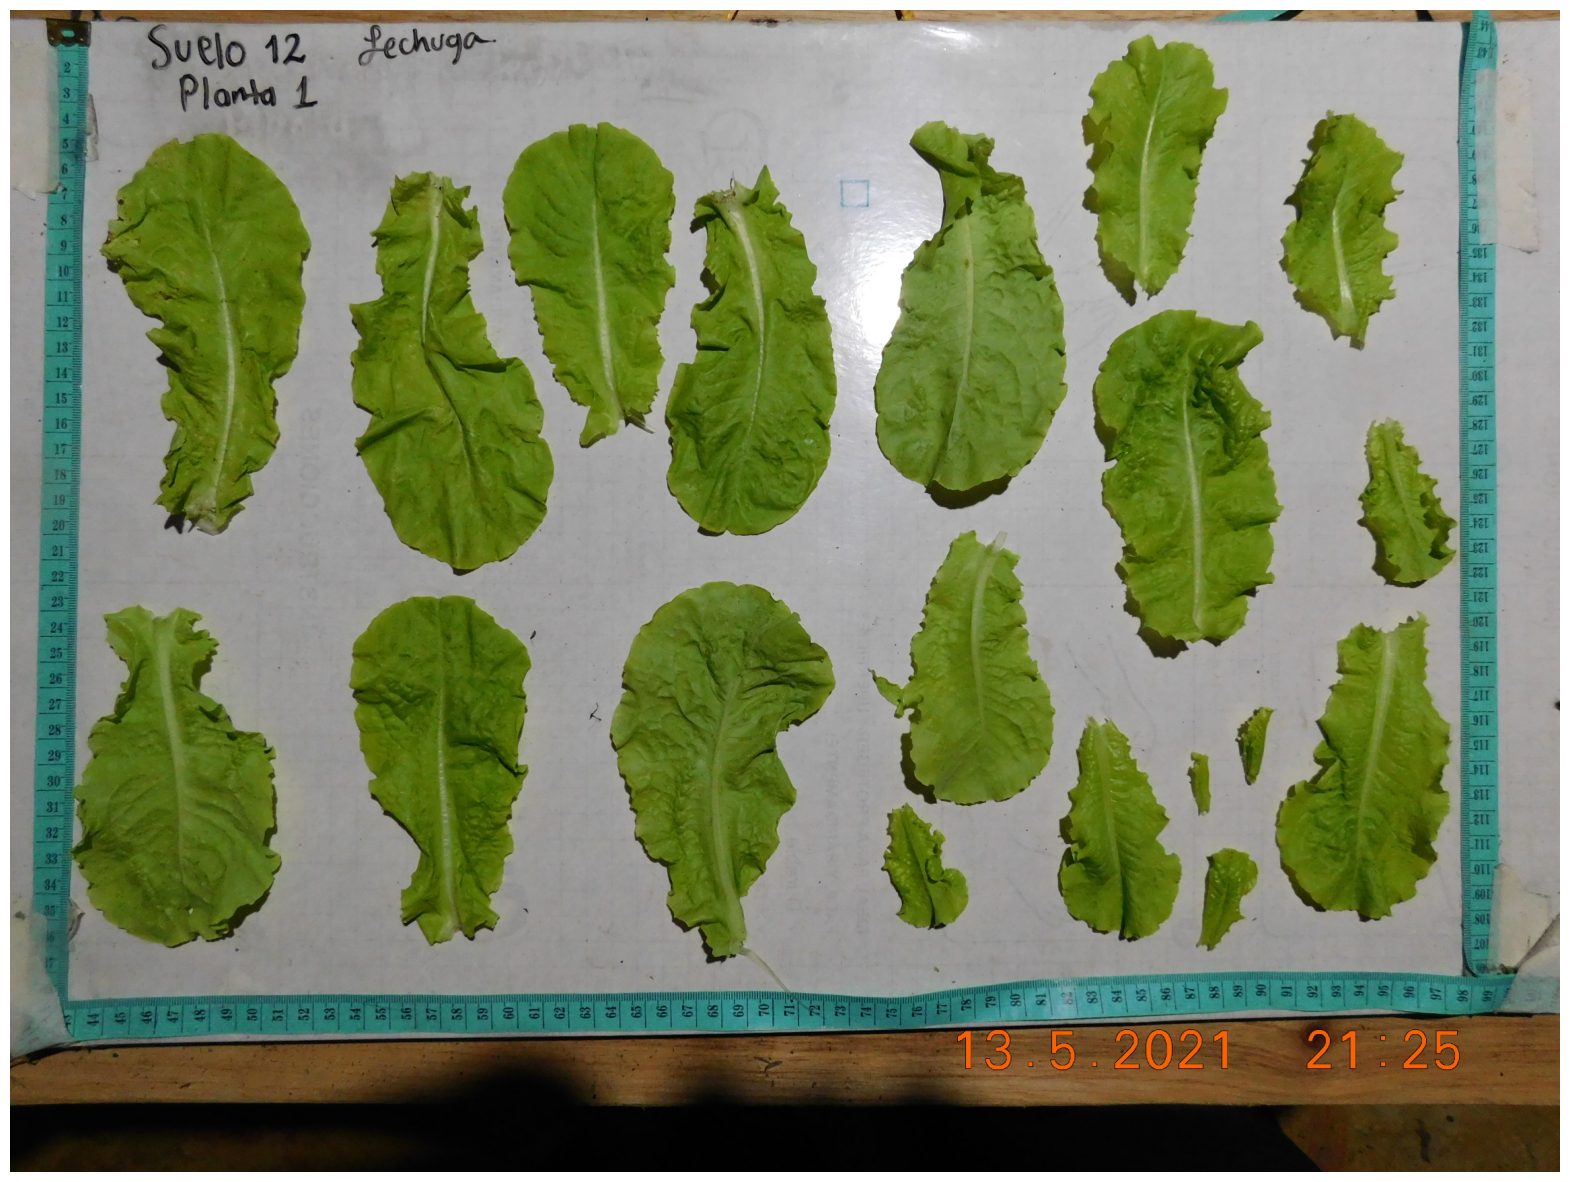

In [10]:
#dimensions of the image
height, width, channels = image.shape
print("Image dimensions: ", height, width, channels)

#Resizing the image for CUDA out of memory error
image = cv2.resize(image, (width//2, height//2))
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()


In [11]:
print(torch.cuda.is_available())

True


In [12]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
sam_checkpoint = "models/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [13]:
masks = mask_generator.generate(image)

In [14]:
print(len(masks))
print(masks[0].keys())

53
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


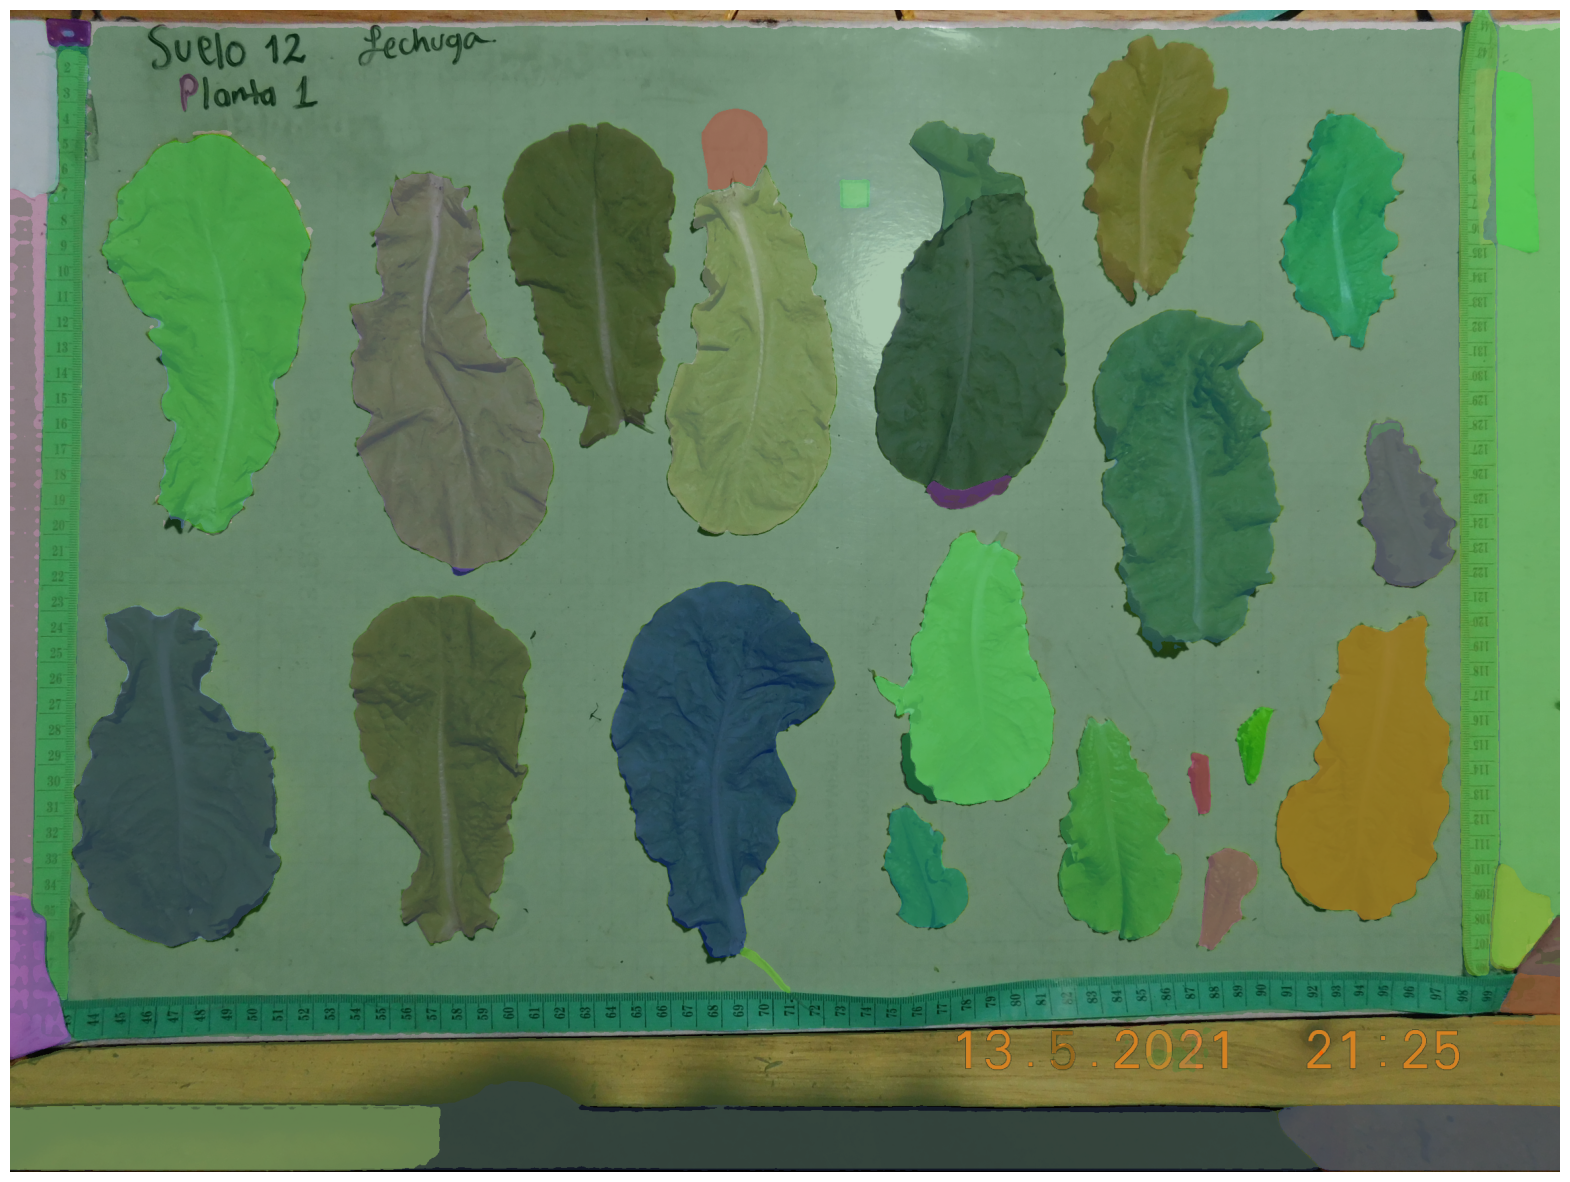

True

In [17]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 
#Guarda el resultado en la carpeta de salida
cv2.imwrite("test_result/DSCN2991_masked.jpg", image)